# Projeto 3 - Ciência dos Dados - Regressão & Criptomoedas

**Alunos** :  Lucas Muchaluat, Luiz Vitor Germanos e Matheus Ferreira

**Turma** :  Engenharia 2B

### Introdução

No mercado financeiro existe uma ideia geral que tanto o ouro quanto o bitcoin são ativos com valores intrínsecos, sendo usadas como válvula de escape quando ocorre um colapso e as ações de empresas começam a desvalorizar, exemplo disso é a crise de 20081onde a bolsa dos EUA (que é o mercado analisado neste projeto) despencou causando uma fuga para o ouro, aumentando o seu valor. O bitcoin foi criado em meados de 2008 justamente como uma resposta a instabilidade proporcionada pela crise, usando o sistema blockchain para descentralizar o poder sobre a moeda.

***(link do preço do ouro, frente ao dolar durante a crise: https://www.macrotrends.net/1335/dollar-vs-gold-comparison-last-ten-years)***

**Pergunta norteadora:** Existe alguma relação entre os preços do Bitcoin e Ouro (Spot)? Seriam ambos relacionados por serem válvulas de escape em crises? Seria possível prever um a partir do outro? Mito ou verdade?


### Procedimentos:

Inicialmente, decidimos testar se realmente a moeda escolhida para ser analisada (Bitcoin) era a mais relevante neste contexto de criptos. Para isso, decidimos analisar a porcentagem que cada criptomoeda detém no mercado e validar nossa escolha.

Em seguida, fizemos a regressão simples da variacao do preco do ouro com o preço do Bitcoin  no espaço de tempo de um dia. Depois, cruzamos a variação do preço do metal precioso com as criptomoedas mais relevantes em uma regressão múltipla, para tentar prever o seu valor. 

Outra análise feita foi cruzar a variação preço do ouro, em uma regressão simples, com a variação do Bitcoin em períodos diferentes: semanal, mensal e semestral.


### Importando as bibliotecas

In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm, probplot
import statsmodels.api as sm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')
# # plt.style.use('ggplot')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Obtendo as bases de dados 

In [2]:
#lendo informação obtida no site coinmarketcap.com
cmc_2017 = pd.read_csv("coinmarketcap_06122017.csv")
#imprimindo as primeiras linhas do dataset
cmc_2017.head(5)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [3]:
#realizando os mesmos passos feitos acima para 2018
cmc_2018 = pd.read_csv("coinmarketcap_06012018.csv")
cmc_2018.head(5)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,22081300000,16785225,bitcoin,1515230661,284909052105,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,16785225
1,1,5221370000,38739144847,ripple,1515230641,119207709132,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,99993093880
2,2,5705690000,96803840,ethereum,1515230649,100115499075,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,96803840
3,3,1569900000,16896225,bitcoin-cash,1515230652,44424061657,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,16896225
4,4,428305000,25927070538,cardano,1515230654,25916647856,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,31112483745


In [4]:
#listando as colunas do dataset
list(cmc_2017)

['Unnamed: 0',
 '24h_volume_usd',
 'available_supply',
 'id',
 'last_updated',
 'market_cap_usd',
 'max_supply',
 'name',
 'percent_change_1h',
 'percent_change_24h',
 'percent_change_7d',
 'price_btc',
 'price_usd',
 'rank',
 'symbol',
 'total_supply']

### Recortando e preparando os datasets

In [5]:
# Selecionando as colunas 'name' e 'market_cap_usd'
market_cap_2017 = cmc_2017[['name', 'market_cap_usd']]
market_cap_2018 = cmc_2018[['name', 'market_cap_usd']]

# Contando o número de valores de cada uma delas
market_cap_2017.count()

name              1326
market_cap_usd    1031
dtype: int64

##### Como existem mais moedas que market caps podemos concluir que existem moedas sem um share no mercado.

In [6]:
# Filtrando as linhas sem um market capitalization
# market_cap = market_cap.query('market_cap_usd > 0')
market_cap_2017 = market_cap_2017[market_cap_2017["market_cap_usd"]>0]
market_cap_2018 = market_cap_2018[market_cap_2018["market_cap_usd"]>0]

# Contando o número de valores novamente
market_cap_2017.count()

name              1031
market_cap_usd    1031
dtype: int64

### Analisando o tamanho de cada moeda no mercado

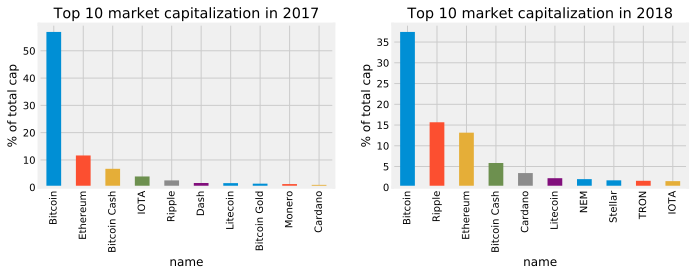

In [7]:
# Selecionando as 10 primeiras linhas e setando o index via nome da moeda
market_cap10_2017 = market_cap_2017.head(10).set_index('name')
market_cap10_2018 = market_cap_2018.head(10).set_index('name')

# Calculando porcentagem do market cap da moeda em relação ao total
market_cap10_2017 = market_cap10_2017.assign(market_cap_perc_2017 = lambda x: (x["market_cap_usd"] / market_cap_2017["market_cap_usd"].sum()) * 100)
market_cap10_2018 = market_cap10_2018.assign(market_cap_perc_2018 = lambda x: (x["market_cap_usd"] / market_cap_2018["market_cap_usd"].sum()) * 100)

# Plotando o gráfico de barras para analisar o tamanho que cada moeda tem no mercado de criptos
plt.figure(figsize=(16,3))
plt.subplot(131)
plot = market_cap10_2017.market_cap_perc_2017.plot.bar(title='Top 10 market capitalization in 2017')
plot.set_ylabel('% of total cap')

plt.subplot(132)
plot = market_cap10_2018.market_cap_perc_2018.plot.bar(title='Top 10 market capitalization in 2018')
plot.set_ylabel('% of total cap');

Se formos analisar as top 3 criptomoedas mais dominantes do mercado em ambos os anos, conseguimos perceber uma que domina recorrentemente o mercado: BITCOIN.

### Visualizando inicialmente a moeda em questão

##### Market Info do Bitcoin

In [8]:

bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))

bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0

bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')

bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")

bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-11-24,4347.69,4413.09,3795.16,3880.76,4679500000,67495633205
1,2018-11-23,4360.70,4396.42,4195.68,4347.11,4871490000,75598851166
2,2018-11-22,4611.57,4629.64,4365.64,4365.94,4569370000,75919439809
3,2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047
4,2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320


In [9]:
#adicionando uma coluna da variação no preço do bitcoin a cada dia
bitcoin_market_info['Delta Bitcoin'] = (bitcoin_market_info['Close'] - bitcoin_market_info['Open'])/bitcoin_market_info['Open']
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Delta Bitcoin
0,2018-11-24,4347.69,4413.09,3795.16,3880.76,4679500000,67495633205,-0.107397
1,2018-11-23,4360.70,4396.42,4195.68,4347.11,4871490000,75598851166,-0.003116
2,2018-11-22,4611.57,4629.64,4365.64,4365.94,4569370000,75919439809,-0.053264
3,2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047,0.030597
4,2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320,-0.084718


In [10]:
#analisando o closing price do bitcoin
bitcoin_market_info['Close'].describe()

count     2037.000000
mean      2283.011546
std       3441.485215
min         68.430000
25%        320.510000
50%        597.150000
75%       2589.600000
max      19497.400000
Name: Close, dtype: float64

##### Plotando o closing price ao longo do tempo 

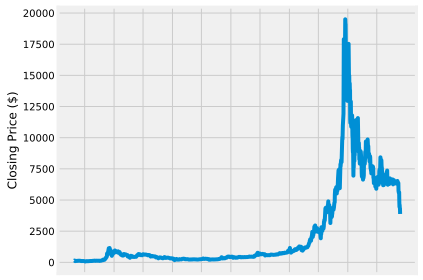

In [11]:
fig, ax1 = plt.subplots(1,1, gridspec_kw = {'height_ratios':[3]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['Close'])
fig.tight_layout()
plt.show()

### Comparando a moeda com o Ouro (XAU)

##### Obtendo os dados a respeito do ouro

In [15]:
Ouro = pd.read_excel('XAU_USD Historical Data (1) 2.xlsx')
Ouro = Ouro.assign(Date=pd.to_datetime(Ouro['Date']))
Ouro["Delta Ouro"] = (Ouro["Price"] - Ouro["Open"])/Ouro["Open"]
Ouro.set_index('Date',inplace = True)
Ouro.head()

,Price,Open,High,Low,Change %,Delta Ouro
Date,,,,,,
2018-11-21,1225.83,1221.74,1230.12,1219.87,0.0035,0.003348
2018-11-20,1221.55,1224.37,1229.17,1219.67,-0.0020,-0.002303
2018-11-19,1224.05,1221.76,1225.26,1217.52,0.0012,0.001874
2018-11-18,1222.62,1222.49,1222.84,1221.69,0.0009,0.000106
2018-11-16,1221.47,1213.02,1225.37,1212.48,0.0070,0.006966


In [23]:
bitcoin_market_info.head()


,Date,Open,High,Low,Close,Volume,Market Cap,Delta Bitcoin
0,2018-11-24,4347.69,4413.09,3795.16,3880.76,4679500000,67495633205,-0.107397
1,2018-11-23,4360.70,4396.42,4195.68,4347.11,4871490000,75598851166,-0.003116
2,2018-11-22,4611.57,4629.64,4365.64,4365.94,4569370000,75919439809,-0.053264
3,2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047,0.030597
4,2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320,-0.084718


##### Cruzando os datasets (Ouro e Bitcoin)

In [24]:
#Cruza as duas tabelas (bitcoin e ouro) via data
bitcoin_market_info.set_index('Date', inplace=True)
#Ouro.set_index('Date', inplace=True)
df = bitcoin_market_info.join(Ouro, how='inner',lsuffix='_btc', rsuffix='_ouro')
df.head()

,Open_btc,High_btc,Low_btc,Close,Volume,Market Cap,Delta Bitcoin,Price,Open_ouro,High_ouro,Low_ouro,Change %,Delta Ouro
Date,,,,,,,,,,,,,
2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047,0.030597,1225.83,1221.74,1230.12,1219.87,0.0035,0.003348
2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320,-0.084718,1221.55,1224.37,1229.17,1219.67,-0.0020,-0.002303
2018-11-19,5620.78,5620.78,4842.91,4871.49,7039560000,84688539692,-0.133307,1224.05,1221.76,1225.26,1217.52,0.0012,0.001874
2018-11-18,5559.74,5653.61,5559.74,5623.54,4159680000,97753714643,0.011475,1222.62,1222.49,1222.84,1221.69,0.0009,0.000106
2018-11-16,5645.32,5657.02,5498.94,5575.55,5279320000,96900828780,-0.012359,1221.47,1213.02,1225.37,1212.48,0.0070,0.006966


### Montando a Regressão

In [25]:
# Função utilitária para fazer a regressão com constante adicionada
def regress_com_const(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [27]:
# Função utilitária para fazer a regressão sem constante adicionada
def regress_sem_const(X,Y):
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

##### Regressão Linear Simples (apenas bitcoin)

Aqui vale ressaltar que faz mais sentido analisar a variação diária RELATIVA do preço do bitcoin e do ouro, visto que os resultados saem mais significativos e permitem melhores conclusões.

In [54]:
#Seleciona os deltas em comparação, além de remover os NaNs
simples = df[['Delta Bitcoin','Delta Ouro']].dropna()

simples['Delta Bitcoin'] = simples['Delta Bitcoin']
simples['Delta Ouro'] = simples['Delta Ouro']
x = simples['Delta Bitcoin']
y = simples['Delta Ouro']


**Regressão simples feita com a constante adicionada**

In [55]:
results1 = regress_com_const(x,y)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     31.31
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.62e-08
Time:                        19:03:36   Log-Likelihood:                 2075.9
No. Observations:                1477   AIC:                            -4148.
Df Residuals:                    1475   BIC:                            -4137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0868      0.008    920.937      0.000       7.072       7.102
Close          0.0062      0.001      5.595      0.000       0.004       0.008
==============================================================================
Omnibus:                       17.492   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.863
Skew:                          -0.222   Prob(JB):                     8.02e-05
Kurtosis:                       3.330   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

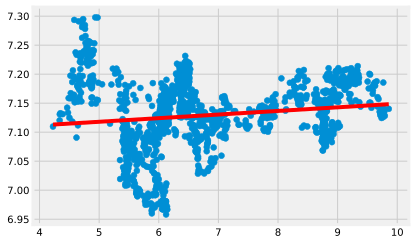

In [56]:
#plotando o gráfico da regressão
x_v = np.linspace(x.min(), x.max(), 500)
x_vc = sm.add_constant(x_v)
y_vc = results1.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);

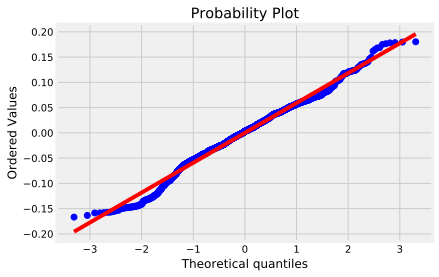

In [57]:
#verificando normalidade dos resíduos
probplot(results1.resid, dist="norm", plot=plt);

**Regressão simples feita sem a constante adicionada**

In [58]:
results2 = regress_sem_const(x,y)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 3.551e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:03:49   Log-Likelihood:                -2618.1
No. Observations:                1477   AIC:                             5238.
Df Residuals:                    1476   BIC:                             5243.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close          1.0100      0.005    188.435      0.000       1.000       1.021
==============================================================================
Omnibus:                      218.688   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.547
Skew:                          -0.497   Prob(JB):                     7.31e-24
Kurtosis:                       2.137   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Regressão Linear Múltipla (analisando influência de outras moedas além do bitcoin)

ETHEREUM

In [ ]:

ethereum_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

ethereum_market_info = ethereum_market_info.assign(Date=pd.to_datetime(ethereum_market_info['Date']))

ethereum_market_info['Volume'] = ethereum_market_info['Volume'].astype('int64')

ethereum_market_info.columns = ethereum_market_info.columns.str.replace("*", "")
ethereum_market_info['Delta Ethereum'] = (ethereum_market_info['Close'] - ethereum_market_info['Open'])/ethereum_market_info['Open']

ethereum_market_info.head()

RIPPLE

In [ ]:

ripple_market_info = pd.read_html("https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
ripple_market_info = ripple_market_info.assign(Date=pd.to_datetime(ripple_market_info['Date']))
# when Volume is equal to '-' convert it to 0
ripple_market_info.loc[ripple_market_info['Volume']=="-",'Volume']=0
# convert to int
ripple_market_info['Volume'] = ripple_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
ripple_market_info.columns = ripple_market_info.columns.str.replace("*", "")
ripple_market_info['Delta Ripple'] = (ripple_market_info['Close'] - ripple_market_info['Open'])/ripple_market_info['Open']
# look at the first few rows
ripple_market_info.head()

##### Juntando os deltas das outras moedas em um unico dataset

In [ ]:
ethereum_market_info["Delta Ethereum"].head()

In [ ]:
#ethereum_market_info.set_index('Date',inplace = True)
DeltaBit = pd.DataFrame(bitcoin_market_info["Delta Bitcoin"])
DeltaEth = pd.DataFrame(ethereum_market_info["Delta Ethereum"])
DeltaOur = pd.DataFrame(Ouro["Delta Ouro"])
DeltaRip = pd.DataFrame(ripple_market_info["Delta Ripple"])
#pd.concat([DeltaBit,DeltaOur,DeltaEth])
multipla = pd.concat([DeltaBit,DeltaOur,DeltaEth,DeltaRip], axis=1, join_axes=[DeltaBit.index]).dropna()
multipla.head()

In [ ]:
Y = multipla['Delta Ouro']
X = multipla[['Delta Bitcoin', 'Delta Ethereum', 'Delta Ripple']]

In [ ]:
results3 = regress_com_const(X,Y)
results3.summary()

##### Montando um gráfico para analisar melhor a previsão do delta do ouro com base no delta do bitcoin e do ethereum (2 mais dominantes do mercado)

In [ ]:
X3 = multipla[['Delta Bitcoin',
       'Delta Ethereum']]
results4 = regress_com_const(X3, Y)
results4.summary()

Pegando os betas individuais:

In [ ]:
c = results4.params["const"]
w = results4.params["Delta Bitcoin"]
u = results4.params["Delta Ethereum"]

In [ ]:
def f(delta_btc, delta_eth):
    return c+w*delta_btc + u*delta_eth

In [ ]:
npoints = 100
delta_btc = np.linspace(X3["Delta Bitcoin"].min(), X3["Delta Bitcoin"].max(), npoints)
delta_eth = np.linspace(X3["Delta Ethereum"].min(), X3["Delta Ethereum"].max(), npoints)

In [ ]:
delta_btc_xx, delta_eth_yy = np.meshgrid(delta_btc, delta_eth)

In [ ]:
z = f(delta_btc_xx, delta_eth_yy)

In [ ]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(delta_btc_xx, delta_eth_yy, z)
plt3d.scatter(X3["Delta Bitcoin"],X3["Delta Ethereum"], Y , color="r")

### Conclusão

A partir de uma rigorosa análise sobre a o valor da commodity Ouro e o valor da criptomoeda Bitcoin, visando buscar uma relação entre elas, que permitisse prever, por meio de uma, o valor da outra, foram utilizadas técnicas de regressão. Após as análises, foi observado que a previsão de uma por meio da outra não é válida, visto que nossa regressão não capta tão bem a variação presente nos dados (R2 próximos ou iguais a 0). 

Com esses resultados foi possível concluir que não é possível prever a moeda com o commodity, ou vise-versa. Porém, as duas estão relacionadas em termos de confiança em seus respectivos meios, o Bitcoin, como a moeda mais confiável no mundo virtual, e o Ouro, como a moeda mais confiável do mundo real. 

Assim, quantitativamente as duas falham ao mostrar uma relação, pois cruzando da regressão não foram encontrados resultados positivos. Por fim é possível constatar que por um lado (quantitativo) é um mito, e por outro (qualitativo) é verdade, demosntrando que não há uma relação quantitativa entre elas, mas sim uma relação simbólica. Inclusive, algumas pessoas até chamam o bitcoin de "ouro digital".

FONTE: https://www.investing.com/currencies/xau-usd (repositório do ouro)


### Possíveis melhoras no resultado:

Aqui, é explorado a possibilidade de se observar um resultado mais significativo, considerando um delta t maior que um dia, no qual seja perceptível uma influência mais clara da variação de uma moeda na outra.

##### Analise Semanal das variações:

In [ ]:
Ouro["Delta Ouro"] = (Ouro["Price"] - Ouro["Open"])/Ouro["Open"]

In [ ]:
Ouro_Semanal = pd.DataFrame({'Date':pd.date_range('2013-05-01', '2018-11-01', freq='7d')})
Ouro_Semanal.set_index('Date',inplace = True)
Ouro_Semanal = Ouro_Semanal.join(Ouro['Price'])
Ouro_Semanal  = Ouro_Semanal.pct_change().dropna()
Ouro_Semanal.head()

In [ ]:
bitcoin_market_info_Semanal = pd.DataFrame({'Date':pd.date_range('2013-05-01', '2018-11-01', freq='7d')})
bitcoin_market_info_Semanal.set_index('Date',inplace = True)
bitcoin_market_info_Semanal = bitcoin_market_info_Semanal.join(bitcoin_market_info['Close'])
bitcoin_market_info_Semanal.head()

In [ ]:
bitcoin_market_info_Semanal = bitcoin_market_info_Semanal.pct_change().dropna()

Regreção sem constante:

In [ ]:
Semanal = bitcoin_market_info_Semanal.join(Ouro_Semanal, how='inner', lsuffix='_btc', rsuffix='_gold').dropna()
Y = Semanal['Close']#DeltaBit
X = Semanal['Price']#PreçoMensal
Resultado = regress_sem_const(X,Y)
Resultado.summary()

Regressão com constante:

In [ ]:
Resultado = regress_com_const(X,Y)
Resultado.summary()

##### Analise Mensal das variações:

In [ ]:
Ouro_Mensal = pd.DataFrame({'Date':pd.date_range('2013-05-01', '2018-11-01', freq='30d')})
Ouro_Mensal.set_index('Date',inplace = True)
Ouro_Mensal = Ouro_Mensal.join(Ouro['Price']).dropna()
Ouro_Mensal = Ouro_Mensal.pct_change().dropna()
Ouro_Mensal.head()

In [ ]:
bitcoin_market_info_Mensal = pd.DataFrame({'Date':pd.date_range('2013-05-01', '2018-11-01', freq='30d')})
bitcoin_market_info_Mensal.set_index('Date',inplace = True)
bitcoin_market_info_Mensal = bitcoin_market_info_Mensal.join(bitcoin_market_info['Close']).dropna()
bitcoin_market_info_Mensal = bitcoin_market_info_Mensal.pct_change().dropna()
bitcoin_market_info_Mensal.head()

Regressão sem constante:

In [ ]:
Mensal = bitcoin_market_info_Mensal.join(Ouro_Mensal, how='inner', lsuffix='_btc', rsuffix='_gold').dropna()
Y = Mensal['Close']#DeltaBit
X = Mensal['Price']#PreçoMensal
Resultado = regress_sem_const(X,Y)
Resultado.summary()


Regressão com constante:

In [ ]:
Mensal = bitcoin_market_info_Mensal.join(Ouro_Mensal, how='inner', lsuffix='_btc', rsuffix='_gold').dropna()
Y = Mensal['Close']#DeltaBit
X = Mensal['Price']#PreçoMensal
Resultado = regress_com_const(X,Y)
Resultado.summary()


##### Analise Semestral das variações:

In [ ]:
Ouro_Semestral = pd.DataFrame({'Date':pd.date_range('2013-03-30', '2018-10-31', freq='6m')})
Ouro_Semestral.set_index('Date',inplace = True)
Ouro_Semestral = Ouro_Semestral.join(Ouro['Price'])
Ouro_Semestral = Ouro_Semestral.pct_change().dropna()
Ouro_Semestral.head()

In [ ]:
bitcoin_market_info_Semestral = pd.DataFrame({'Date':pd.date_range('2013-03-30', '2018-10-31', freq='6m')})
bitcoin_market_info_Semestral.set_index('Date',inplace = True)
bitcoin_market_info_Semestral = bitcoin_market_info_Semestral.join(bitcoin_market_info['Close']).dropna()
bitcoin_market_info_Semestral = bitcoin_market_info_Semestral.pct_change().dropna()
bitcoin_market_info_Semestral.head()

Regressão com constante:

In [ ]:
Semestral = bitcoin_market_info_Semestral.join(Ouro_Semestral, how='inner', lsuffix='_btc', rsuffix='_gold').dropna()
Y = Semestral['Close']#DeltaBit
X = Semestral['Price']#PreçoMensal
Resultado = regress_com_const(X,Y)
Resultado.summary()

Regressão sem constante:

In [ ]:
Semestral = bitcoin_market_info_Semestral.join(Ouro_Semestral, how='inner', lsuffix='_btc', rsuffix='_gold').dropna()
Y = Semestral['Close']#DeltaBit
X = Semestral['Price']#PreçoMensal
Resultado = regress_sem_const(X,Y)
Resultado.summary()